In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, KBinsDiscretizer, power_transform
from sklearn.metrics import accuracy_score

## Data Exploration / Preprocessing

In [4]:
raw_data = pd.read_csv("train.csv", header = 0, encoding ='utf-8')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [5]:
#find which columns have null values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

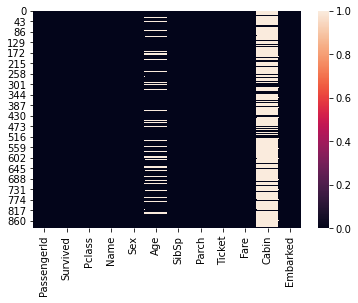

In [6]:
sns.heatmap(raw_data.isnull())

In [7]:
#38% survived
raw_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [8]:
#female survival much higher
raw_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

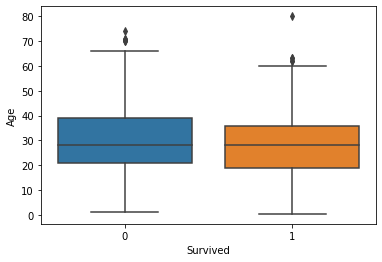

In [9]:
#Notable outliers for age
sns.boxplot(x=raw_data['Survived'], y=raw_data['Age'])

In [10]:
# Survivals by class... 1 and 2 had better chance
pd.pivot_table(raw_data, index='Survived', columns='Pclass', values='PassengerId', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [11]:
#remove (most likely) irrelevant columns - Name, Ticket
#leaving Fare and Embarked for now... I don't think they're relevant but they could be.

data = raw_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
y = data[['Survived']]

In [12]:
# *there are 2 instances where embarked is NaN, so lets just remove those
new_data = data[data['Embarked'].notna()]
new_data

#encode gender
sex_mapping = {
    'female': 0,
    'male': 1
}
new_data['Sex'].replace(sex_mapping, inplace=True)

#encode embarked
embarked_mapping = {
    'C': 0,
    'Q': 1,
    'S': 2
}
new_data['Embarked'].replace(embarked_mapping, inplace=True)

X = new_data[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
y = new_data[['Survived']].values.ravel()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,)

/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


## Random Forests Model

In [178]:
# Baseline random forest classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.797752808988764

In [179]:
#Hyperparameter tuning - using lots of parameters here to see how much this can vary
cv = KFold(n_splits=10, shuffle=True)
param_grids = {
    "n_estimators": [5, 10, 20, 50, 100],
    "max_depth": [3, 5, 10, 20],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_features": [4, 5, 6],
    "max_samples": [50, 100, 300, 500, 711]
}
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grids,
    cv=cv,
    ).fit(X, y)
results = pd.DataFrame(grid_search.cv_results_)

In [180]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=6, max_samples=500,
                       min_samples_leaf=3, n_estimators=50, random_state=0)

In [181]:
#there was a little improvement with a lot of parameter tuning. Let's do some feature engineering and play around with different models.
results.loc[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
873,0.061545,0.003431,0.00438,0.00018,10,6,500,3,50,"{'max_depth': 10, 'max_features': 6, 'max_samp...",0.842697,0.820225,0.797753,0.842697,0.842697,0.808989,0.808989,0.797753,0.797753,0.886364,0.824591,0.027324,1


In [182]:
#First, let's address null values in age. Let's use the mean age for a given gender (no null values for gender)
#i.e. male imputed value is avg male age, female imputed value is avg female age

X2 = new_data[['Pclass','Age','Sex','SibSp','Parch','Fare','Embarked']]
y2 = new_data[['Survived']].values.ravel()

X2['Age'] = X2['Age'].fillna(X2.groupby('Sex')['Age'].transform('mean'))

<ipython-input-182-e29b8025ecc3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Age'] = X2['Age'].fillna(X2.groupby('Sex')['Age'].transform('mean'))


In [183]:
#Hyperparameter tuning part 2 - this time with age. Let's do less tuning this time to see if there's more variability
param_grids = {
    "n_estimators": [5, 20, 50, 100],
    "max_depth": [3, 5, 10, 20],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_features": [4, 5, 6, 7],
}
grid_search2 = GridSearchCV(
    estimator=clf,
    param_grid=param_grids,
    cv=cv,
    verbose=1
    ).fit(X2, y2)
results2 = pd.DataFrame(grid_search2.cv_results_)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


In [184]:
grid_search2.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=2,
                       n_estimators=50, random_state=0)

In [185]:
# imputed age helped a little bit, so let's keep it. Still, some features may be creating some noise
results2.loc[results2['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
134,0.066558,0.002776,0.004443,0.000153,10,4,2,50,"{'max_depth': 10, 'max_features': 4, 'min_samp...",0.876404,0.808989,0.865169,0.820225,0.876404,0.921348,0.853933,0.820225,0.808989,0.840909,0.849259,0.034561,1


<AxesSubplot:>

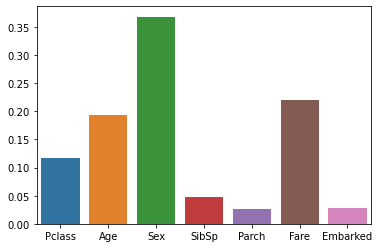

In [186]:
importances = pd.DataFrame(grid_search2.best_estimator_.feature_importances_)
importances = importances.T
importances.columns = X2.columns

sns.barplot(data=importances)

In [187]:
X3 = new_data[['Pclass','Sex','Fare', 'Age']]
X3['Age'] = X3['Age'].fillna(X3.groupby('Sex')['Age'].transform('mean'))
y3 = new_data[['Survived']].values.ravel()

#Hyperparameter tuning part 3 - this time with only the top 4 most important featgures. Let's do less tuning this time to see if there's more variability
param_grids = {
    "n_estimators": [5, 20, 50, 100],
    "max_depth": [3, 5, 10, 20],
    "max_features": [3, 4],
}
grid_search3 = GridSearchCV(
    estimator=clf,
    param_grid=param_grids,
    cv=cv,
    ).fit(X3, y3)
results3 = pd.DataFrame(grid_search3.cv_results_)

<ipython-input-187-1e0f7d648ed5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['Age'] = X3['Age'].fillna(X3.groupby('Sex')['Age'].transform('mean'))


In [188]:
results3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009799,0.001858,0.002272,0.000337,3,3,5,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.752809,0.752809,0.865169,0.853933,0.842697,0.786517,0.853933,0.876404,0.876404,0.727273,0.818795,0.054731,17
1,0.025641,0.001137,0.003032,0.000354,3,3,20,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.775281,0.730337,0.876404,0.842697,0.853933,0.775281,0.865169,0.887640,0.887640,0.727273,0.822165,0.060522,11
2,0.057168,0.003244,0.004341,0.000232,3,3,50,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.752809,0.730337,0.865169,0.842697,0.853933,0.775281,0.876404,0.887640,0.876404,0.727273,0.818795,0.061468,17
3,0.113163,0.005563,0.007498,0.000803,3,3,100,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.752809,0.730337,0.876404,0.831461,0.853933,0.775281,0.876404,0.898876,0.876404,0.727273,0.819918,0.063404,13
4,0.007780,0.000470,0.001933,0.000166,3,4,5,"{'max_depth': 3, 'max_features': 4, 'n_estimat...",0.775281,0.730337,0.853933,0.842697,0.842697,0.786517,0.853933,0.876404,0.876404,0.727273,0.816547,0.054162,21
5,0.023936,0.000836,0.002562,0.000082,3,4,20,"{'max_depth': 3, 'max_features': 4, 'n_estimat...",0.764045,0.730337,0.842697,0.842697,0.853933,0.764045,0.842697,0.876404,0.865169,0.704545,0.808657,0.058535,28
6,0.055926,0.000230,0.004081,0.000072,3,4,50,"{'max_depth': 3, 'max_features': 4, 'n_estimat...",0.752809,0.730337,0.842697,0.842697,0.842697,0.764045,0.865169,0.876404,0.865169,0.727273,0.810930,0.056805,26
7,0.110773,0.000900,0.006811,0.000220,3,4,100,"{'max_depth': 3, 'max_features': 4, 'n_estimat...",0.752809,0.730337,0.853933,0.842697,0.853933,0.764045,0.865169,0.887640,0.865169,0.727273,0.814300,0.059525,23
8,0.007573,0.000124,0.001770,0.000064,5,3,5,"{'max_depth': 5, 'max_features': 3, 'n_estimat...",0.752809,0.730337,0.887640,0.820225,0.853933,0.775281,0.797753,0.853933,0.887640,0.772727,0.813228,0.053177,24
9,0.025197,0.000718,0.002670,0.000080,5,3,20,"{'max_depth': 5, 'max_features': 3, 'n_estimat...",0.775281,0.730337,0.887640,0.842697,0.865169,0.764045,0.853933,0.887640,0.887640,0.738636,0.823302,0.060921,8


In [189]:
grid_search3.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=50,
                       random_state=0)

In [190]:
# results are almost the same with only these four columns
results3.loc[results3['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
22,0.073892,0.003285,0.004651,0.000377,10,4,50,"{'max_depth': 10, 'max_features': 4, 'n_estima...",0.786517,0.797753,0.88764,0.865169,0.853933,0.752809,0.853933,0.831461,0.876404,0.784091,0.828971,0.043413,1


#### More EDA

In [43]:
raw_data
#titles could be useful, cabins could be useful but are limited
#I'm suspecting interactions between Sex/Age, Sex/Parch, 
#I can't see a reasonable strategy for tickets seeing how many are just numbers, and I don't think they could really provide much more info than either embarked or price

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [73]:
#title extraction - NOTE: I tried this with one-hot encoding (and consolidating titles like Ms -> Mrs, but performance was actually worse.)
title = []
i=0
for name in raw_data['Name']:
    i+=1
    parts = name.split('.')
    before_period = parts[0].strip()
    title.append(before_period.split(',')[-1])
titles = pd.DataFrame(title)
titles.rename(columns={titles.columns[0]: 'Title'}, inplace=True)

In [74]:
titles.value_counts()

Title        
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Jonkheer          1
 Don               1
 the Countess      1
 Lady              1
 Sir               1
 Mme               1
 Ms                1
 Capt              1
dtype: int64

In [329]:
new_features = pd.DataFrame(titles)
le = LabelEncoder()
new_features['Title'] = le.fit_transform(new_features)
new_features

/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Title
0,11
1,12
2,8
3,12
4,11
5,11
6,11
7,7
8,12
9,12


<AxesSubplot:xlabel='Age', ylabel='Sex'>

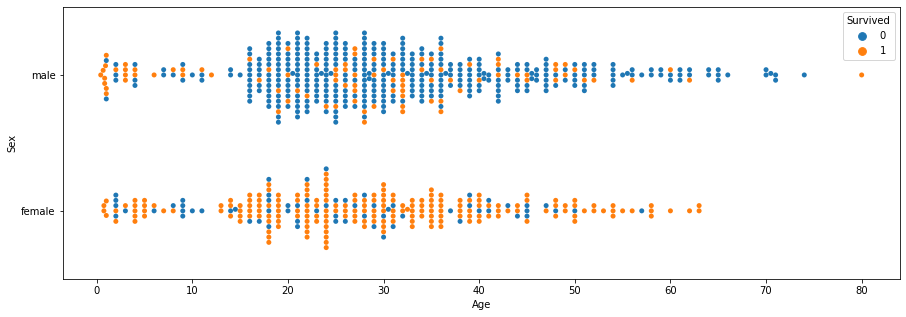

In [107]:
#Age seems more important in males
fix, ax = plt.subplots(figsize=(15,5))
sns.swarmplot(x=raw_data['Age'], y=raw_data['Sex'], hue=raw_data['Survived'])

/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Parch', ylabel='Age'>

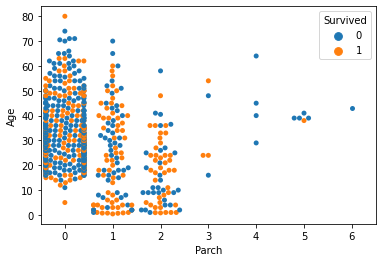

In [110]:
sns.swarmplot(x=raw_data['Parch'], y=raw_data['Age'], hue=raw_data['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

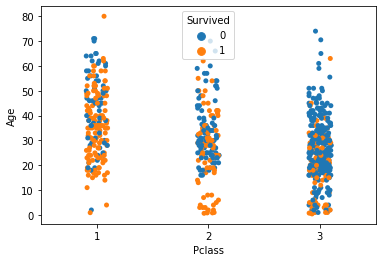

In [99]:
sns.stripplot(x=raw_data['Pclass'], y=raw_data['Age'], hue=raw_data['Survived'])
#young people in class 2 survived

<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

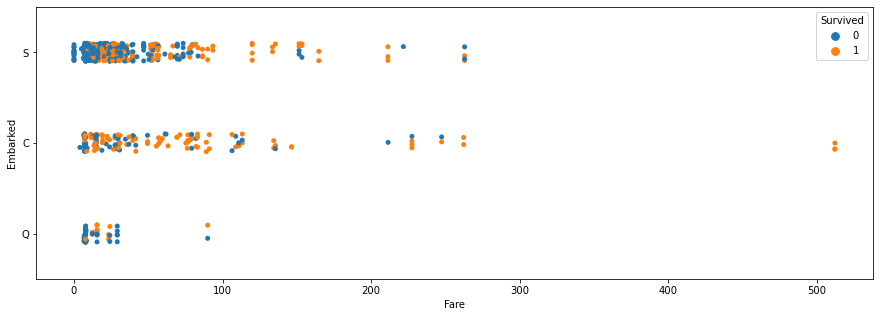

In [139]:
fix, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x=raw_data['Fare'], y=raw_data['Embarked'], hue=raw_data['Survived'])

In [136]:
X5 = X3
X5['Title'] = new_features
y5 = y3
X5

<ipython-input-136-54dee6886562>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5['Title'] = new_features


,Pclass,Sex,Fare,Age,Title
0,3,1,7.2500,22.000000,11
1,1,0,71.2833,38.000000,12
2,3,0,7.9250,26.000000,8
3,1,0,53.1000,35.000000,12
4,3,1,8.0500,35.000000,11
5,3,1,8.4583,30.726645,11
6,1,1,51.8625,54.000000,11
7,3,1,21.0750,2.000000,7
8,3,0,11.1333,27.000000,12
9,2,0,30.0708,14.000000,12


In [191]:
#Hyperparameter tuning part 5 - this time with Title.
param_grids = {
    "n_estimators": [5, 20, 50, 100],
    "max_depth": [3, 5, 10, 20],
    "max_features": [3, 4, 5],
}
grid_search5 = GridSearchCV(
    estimator=clf,
    param_grid=param_grids,
    cv=cv,
    ).fit(X5, y5)
results5 = pd.DataFrame(grid_search5.cv_results_)

In [192]:
#Improvement!
results5.loc[results5['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
34,0.073541,0.001316,0.004415,0.000088,10,5,50,"{'max_depth': 10, 'max_features': 5, 'n_estima...",0.842697,0.876404,0.853933,0.910112,0.820225,0.797753,0.842697,0.764045,0.910112,0.840909,0.845889,0.043548,1


In [193]:
grid_search5.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=50,
                       random_state=0)

### I'm wondering if the continuous features are impacting the model's ability to fit either via outliers, skew, or adding too much noise. Random Forests are typically robust to these, but with a small data set and huge outliers, they could be doing something

In [143]:
X5['Age'].describe()

count    889.000000
mean      29.680279
std       12.982895
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

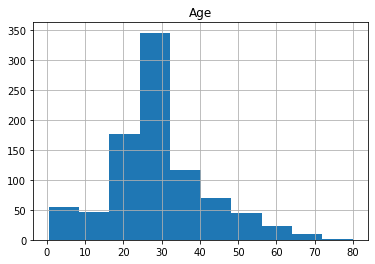

In [144]:
#since this looks pretty normal, I'm going to use quantile segmentation.
X5.hist(column='Age')

In [199]:
X6 = X5.copy()
y6 = y5.copy()

In [200]:
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X6['Age'] = kbd.fit_transform(X6[['Age']])
X6

/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,Pclass,Sex,Fare,Age,Title
0,3,1,7.2500,1.0,11
1,1,0,71.2833,2.0,12
2,3,0,7.9250,1.0,8
3,1,0,53.1000,2.0,12
4,3,1,8.0500,2.0,11
5,3,1,8.4583,1.0,11
6,1,1,51.8625,3.0,11
7,3,1,21.0750,0.0,7
8,3,0,11.1333,1.0,12
9,2,0,30.0708,0.0,12


In [194]:
#Hyperparameter tuning part 6 - this time with age binning
param_grids = {
    "n_estimators": [5, 20, 50, 100],
    "max_depth": [3, 5, 10, 20],
    "max_features": [3, 4, 5],
}
grid_search6 = GridSearchCV(
    estimator=clf,
    param_grid=param_grids,
    cv=cv,
    ).fit(X6, y6)
results6 = pd.DataFrame(grid_search6.cv_results_)

In [195]:
#didn't necessarily help
results6.loc[results6['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
19,0.113327,0.002982,0.006984,0.000219,5,4,100,"{'max_depth': 5, 'max_features': 4, 'n_estimat...",0.853933,0.853933,0.842697,0.853933,0.820225,0.842697,0.786517,0.820225,0.820225,0.886364,0.838075,0.025967,1


In [196]:
grid_search6.best_estimator_

RandomForestClassifier(max_depth=5, max_features=4, random_state=0)

In [198]:
#lets look at fare
X7 = X5.copy()
y7 = y5.copy()
X7

,Pclass,Sex,Fare,Age,Title
0,3,1,7.2500,22.000000,11
1,1,0,71.2833,38.000000,12
2,3,0,7.9250,26.000000,8
3,1,0,53.1000,35.000000,12
4,3,1,8.0500,35.000000,11
5,3,1,8.4583,30.726645,11
6,1,1,51.8625,54.000000,11
7,3,1,21.0750,2.000000,7
8,3,0,11.1333,27.000000,12
9,2,0,30.0708,14.000000,12


In [202]:
X5['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

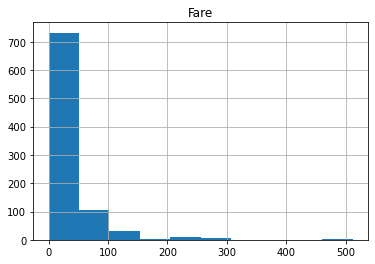

In [204]:
X5.hist(column='Fare')

In [214]:
#box-cox transformation to address left skew. First, we need to make 0 values non-0 first
X7.loc[X7['Fare'] == 0]
X7['Fare'].replace(0, .01, inplace=True)

#then, apply transformation
X7['Fare'] = power_transform(X7[['Fare']], method='box-cox')
X7

,Pclass,Sex,Fare,Age,Title
0,3,1,-0.774831,22.000000,11
1,1,0,1.289342,38.000000,12
2,3,0,-0.709363,26.000000,8
3,1,0,0.973229,35.000000,12
4,3,1,-0.697745,35.000000,11
5,3,1,-0.660797,30.726645,11
6,1,1,0.948636,54.000000,11
7,3,1,0.083687,2.000000,7
8,3,0,-0.449472,27.000000,12
9,2,0,0.408421,14.000000,12


In [240]:
#Hyperparameter tuning part 7 - this time with scaled fares
param_grids = {
    "n_estimators": [5, 20, 50, 100],
    "max_depth": [3, 5, 10, 20],
    "max_features": [3, 4, 5],
}
grid_search7 = GridSearchCV(
    estimator=clf,
    param_grid=param_grids,
    cv=cv,
    ).fit(X7, y7)
results7 = pd.DataFrame(grid_search7.cv_results_)

In [241]:
#didn't necessarily help
results7.loc[results7['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
31,0.146135,0.010468,0.008389,0.001617,10,4,100,"{'max_depth': 10, 'max_features': 4, 'n_estima...",0.865169,0.842697,0.820225,0.865169,0.842697,0.842697,0.820225,0.865169,0.842697,0.784091,0.839083,0.024143,1


In [242]:
grid_search7.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, random_state=0)

In [219]:
X8 = X6.copy()
y8 = y6.copy()
X8['Fare'] = X7['Fare']

In [221]:
#Hyperparameter tuning part 8 - trying both b/c why not
param_grids = {
    "n_estimators": [5, 20, 50, 100],
    "max_depth": [3, 5, 10, 20],
    "max_features": [3, 4, 5],
}
grid_search8 = GridSearchCV(
    estimator=clf,
    param_grid=param_grids,
    cv=cv,
    ).fit(X8, y8)
results8 = pd.DataFrame(grid_search8.cv_results_)

In [222]:
#potentially helped
results8.loc[results8['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
22,0.064366,0.00683,0.004616,0.000367,5,5,50,"{'max_depth': 5, 'max_features': 5, 'n_estimat...",0.876404,0.898876,0.820225,0.820225,0.865169,0.853933,0.831461,0.808989,0.820225,0.829545,0.842505,0.02806,1


In [223]:
grid_search8.best_estimator_

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=50,
                       random_state=0)

In [236]:
# Last model I'm going to try: all (usable) features, but with scaled fare and titles.
X9 = X2.copy()
X9['Fare'] = X8['Fare']
X9['Title'] = X5['Title']
y9 = y8.copy()
X9

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Title
0,3,22.000000,1,1,0,-0.774831,2,11
1,1,38.000000,0,1,0,1.289342,0,12
2,3,26.000000,0,0,0,-0.709363,2,8
3,1,35.000000,0,1,0,0.973229,2,12
4,3,35.000000,1,0,0,-0.697745,2,11
5,3,30.726645,1,0,0,-0.660797,1,11
6,1,54.000000,1,0,0,0.948636,2,11
7,3,2.000000,1,3,1,0.083687,2,7
8,3,27.000000,0,0,2,-0.449472,2,12
9,2,14.000000,0,1,0,0.408421,0,12


In [237]:
#Hyperparameter tuning part 9 - final try
param_grids = {
    "n_estimators": [5, 20, 50, 100],
    "max_depth": [3, 5, 10, 20],
    "max_features": [3, 4, 5],
}
grid_search9 = GridSearchCV(
    estimator=clf,
    param_grid=param_grids,
    cv=cv,
    ).fit(X9, y9)
results9 = pd.DataFrame(grid_search9.cv_results_)

In [238]:
#potentially helped
results9.loc[results9['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
27,0.137849,0.006009,0.008451,0.001473,10,3,100,"{'max_depth': 10, 'max_features': 3, 'n_estima...",0.808989,0.876404,0.820225,0.865169,0.842697,0.865169,0.898876,0.797753,0.786517,0.818182,0.837998,0.035355,1


In [239]:
grid_search9.best_estimator_

RandomForestClassifier(max_depth=10, max_features=3, random_state=0)

In conclusion, model 5 worked the best. This model contained Pclass, Sex, Fare, Age, and Title. I think this makes sense, for the following reasons:\
Passenger ID = N/A\
Pclass (used) = Probably influences location on the boat - or how much they are attended to.\
Name (used) = Title extraction ended up being helpful. I can see status impacting who is first to be saved.\
Sex (used) = Undeniably most important. This is verified via EDA, but also is a well-known fact ("women and children")\
Age (used) = Similar to sex - "women and children".\
SibSp (dropped) = This didn't improve accuracy in any situation - probably just adds noise to Age and Sex\
Parch (dropped) = Similar to SibSp - probably just added noise.\
Ticket (dropped) = I really just couldn't see a useful extraction here if Embarked was useless.\
Fare (used) = Also probably influences location on boat or how much they are attended to.\
Cabin (dropped) = Too many null values for such a small training set.\
Embarked (dropped) = I can only see this adding noise when Fare and Pclass are usefull. Logically it wouldn't help.

## Prepare Test Set

In [447]:
test_data = pd.read_csv("test.csv", header = 0, encoding ='utf-8')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

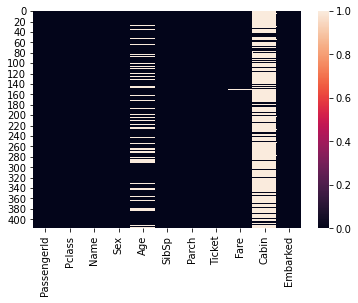

In [448]:
sns.heatmap(test_data.isnull())

In [449]:
#We'll have to impute one value for fare, impute age values, then do title extraction.
X_test = test_data[['Pclass', 'Name', 'Sex', 'Age', 'Fare']].copy()
X_test['Sex'].replace('female', 0, inplace=True)
X_test['Sex'].replace('male', 1, inplace=True)
X_test

,Pclass,Name,Sex,Age,Fare
0,3,"Kelly, Mr. James",1,34.50,7.8292
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00,7.0000
2,2,"Myles, Mr. Thomas Francis",1,62.00,9.6875
3,3,"Wirz, Mr. Albert",1,27.00,8.6625
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00,12.2875
5,3,"Svensson, Mr. Johan Cervin",1,14.00,9.2250
6,3,"Connolly, Miss. Kate",0,30.00,7.6292
7,2,"Caldwell, Mr. Albert Francis",1,26.00,29.0000
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.00,7.2292
9,3,"Davies, Mr. John Samuel",1,21.00,24.1500


In [450]:
titles.value_counts()

Title        
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Jonkheer          1
 Don               1
 the Countess      1
 Lady              1
 Sir               1
 Mme               1
 Ms                1
 Capt              1
dtype: int64

In [451]:
#title extraction
test_title = []
i=0
for name in X_test['Name']:
    i+=1
    parts = name.split('.')
    before_period = parts[0].strip()
    test_title.append(before_period.split(',')[-1])
test_titles = pd.DataFrame(test_title)
test_titles.rename(columns={test_titles.columns[0]: 'Title'}, inplace=True)

In [452]:
test_titles.value_counts()

Title  
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Ms          1
 Dr          1
 Dona        1
dtype: int64

In [453]:
test_titles

,Title
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs
5,Mr
6,Miss
7,Mr
8,Mrs
9,Mr


In [454]:
#Dona means Mrs or Madam in spanish. Lets just change it to Mrs in the test set.
X_test[X_test['Name'].str.contains("Dona")]

,Pclass,Name,Sex,Age,Fare
239,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",0,48.0,106.425
414,1,"Oliva y Ocana, Dona. Fermina",0,39.0,108.900


In [455]:
X_test['Title'] = test_titles
X_test['Title'].replace(' Dona', ' Mrs', inplace=True)

In [456]:
X_test

,Pclass,Name,Sex,Age,Fare,Title
0,3,"Kelly, Mr. James",1,34.50,7.8292,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00,7.0000,Mrs
2,2,"Myles, Mr. Thomas Francis",1,62.00,9.6875,Mr
3,3,"Wirz, Mr. Albert",1,27.00,8.6625,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00,12.2875,Mrs
5,3,"Svensson, Mr. Johan Cervin",1,14.00,9.2250,Mr
6,3,"Connolly, Miss. Kate",0,30.00,7.6292,Miss
7,2,"Caldwell, Mr. Albert Francis",1,26.00,29.0000,Mr
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.00,7.2292,Mrs
9,3,"Davies, Mr. John Samuel",1,21.00,24.1500,Mr


In [457]:
#hardcoding to ensure labeling is consistent
title_mapping = {
    ' Mr': 11,
    ' Miss': 8,
    ' Mrs': 12,
    ' Master': 7,
    ' Rev': 14,
    ' Col': 1,
    ' Ms': 13,
    ' Dr': 3
}
X_test['Title'].replace(title_mapping, inplace=True)
X_test.drop(['Name'], axis=1, inplace=True)

In [458]:
#impute age
X_test['Age'] = np.where((X_test['Age'].isnull()) & (X_test['Sex'] == 1), 30.726645, X_test['Age'])
X_test['Age'] = np.where((X_test['Age'].isnull()) & (X_test['Sex'] == 0), 27.745174, X_test['Age'])

In [459]:
#impute fare (using training set avg fare)
fare_imp =  new_data['Fare'].mean()
X_test['Fare'].fillna(fare_imp, inplace=True)

In [460]:
# Rearrange
X_test = X_test[['Pclass','Sex', 'Fare', 'Age', 'Title']]
X_test

,Pclass,Sex,Fare,Age,Title
0,3,1,7.829200,34.500000,11
1,3,0,7.000000,47.000000,12
2,2,1,9.687500,62.000000,11
3,3,1,8.662500,27.000000,11
4,3,0,12.287500,22.000000,12
5,3,1,9.225000,14.000000,11
6,3,0,7.629200,30.000000,8
7,2,1,29.000000,26.000000,11
8,3,0,7.229200,18.000000,12
9,3,1,24.150000,21.000000,11


## Fit and Predict

In [360]:
#Build classifier and make predictions
grid_search5.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=50,
                       random_state=0)

In [462]:
clf_test = RandomForestClassifier(max_depth=10, max_features=5, n_estimators=50)
clf_test.fit(X5,y5)
y_pred = clf_test.predict(X_test)

In [2]:
#predictions_df = pd.DataFrame(y_pred)

In [464]:
submission = test_data[['PassengerId']]
submission['Survived'] = predictions_df
submission

<ipython-input-464-9afec3f91ea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Survived'] = predictions_df


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [466]:
submission.to_csv('/Users/willthompson/Documents/TitanicSubmission/gender_submission3.csv', index=False)

# Result: ~78% Accuracy